# PACKAGE IMPORTS

<div class="alert alert-block alert-info">
These libraries and tools collectively provide a comprehensive set of capabilities for handling data (pandas, numpy), manipulating text (re, nltk), and performing advanced natural language processing tasks (nltk). They are widely used in data science, machine learning, and text analytics projects due to their efficiency and versatility.








In [ ]:
!pip install contractions nltk

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import contractions

from nltk.probability import FreqDist
from wordcloud import WordCloud


# DATA LOADING

In [ ]:
#Put back the right path

train_data = pd.read_csv('test.csv')
test_data = pd.read_csv('train.csv')

In [ ]:
train_data.head()

,headlines,description,content,url,category
0,NLC India wins contract for power supply to Ra...,State-owned firm NLC India Ltd (NLCIL) on Mond...,State-owned firm NLC India Ltd (NLCIL) on Mond...,https://indianexpress.com/article/business/com...,business
1,SBI Clerk prelims exams dates announced; admit...,SBI Clerk Prelims Exam: The SBI Clerk prelims ...,SBI Clerk Prelims Exam: The State Bank of Indi...,https://indianexpress.com/article/education/sb...,education
2,"Golden Globes: Michelle Yeoh, Will Ferrell, An...","Barbie is the top nominee this year, followed ...","Michelle Yeoh, Will Ferrell, Angela Bassett an...",https://indianexpress.com/article/entertainmen...,entertainment
3,"OnePlus Nord 3 at Rs 27,999 as part of new pri...",New deal makes the OnePlus Nord 3 an easy purc...,"In our review of the OnePlus Nord 3 5G, we pra...",https://indianexpress.com/article/technology/t...,technology
4,Adani family’s partners used ‘opaque’ funds to...,Citing review of files from multiple tax haven...,Millions of dollars were invested in some publ...,https://indianexpress.com/article/business/ada...,business


In [ ]:
test_data.head()

,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,https://indianexpress.com/article/business/ban...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,https://indianexpress.com/article/business/com...,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,https://indianexpress.com/article/business/mar...,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,https://indianexpress.com/article/business/eco...,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,https://indianexpress.com/article/business/eco...,business


# Data Cleaning and Preprocessing for Text Analysis

<div class="alert alert-block alert-info">  
This section covers the process of data cleaning, which involves preparing text data for analysis by removing errors and inconsistencies. It includes downloading NLTK packages, loading datasets, and cleaning the text by removing noise, punctuation,converting to lowercase, and removing contractions. The text is then tokenized, stop words are removed, and words are stemmed and lemmatized. Finally, the processed text is reassembled into strings, with an option to save the cleaned datasets to CSV files.








In [ ]:
import re
import nltk
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Clean text: remove noise and punctuation, convert to lower case
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove all punctuations and special characters
    text = text.strip().lower()

    # Remove contractions
    text = contractions.fix(text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Convert tokens back to a single string
    processed_text = ' '.join(tokens)

    return processed_text

def preprocess_data(df):

    df['headlines'] = df['headlines'].apply(preprocess_text)
    df['description'] = df['description'].apply(preprocess_text)
    df['content'] = df['content'].apply(preprocess_text)

    # Replace URLs with a placeholder
    pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    url_placeholder = 'url-web'
    df['url'] = df['url'].replace(to_replace=pattern_url, value=url_placeholder, regex=True)

    return df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
train_data_cleaned = preprocess_data(train_data)
test_data_cleaned = preprocess_data(test_data)

In [ ]:
train_data_cleaned.head()

,headlines,description,content,url,category
0,nlc india win contract power suppli rajasthan ...,stateown firm nlc india ltd nlcil monday said ...,stateown firm nlc india ltd nlcil monday said ...,url-web,business
1,sbi clerk prelim exam date announc admit card ...,sbi clerk prelim exam sbi clerk prelim exam 20...,sbi clerk prelim exam state bank indian sbi an...,url-web,education
2,golden globe michel yeoh ferrel angela bassett...,barbi top nomine year follow close oppenheim f...,michel yeoh ferrel angela bassett amanda seyfr...,url-web,entertainment
3,oneplu nord 3 r 27999 part new price cut,new deal make oneplu nord 3 easi purchas r 30k,review oneplu nord 3 5g prais balanc combin fe...,url-web,technology
4,adani famili partner use opaqu fund invest sto...,cite review file multipl tax haven intern adan...,million dollar invest publicli trade stock ind...,url-web,business


In [ ]:
X_train_EDA = train_data_cleaned.copy()

In [ ]:
print("Dataset shape:", X_train_EDA.shape)
print(X_train_EDA.info())

Dataset shape: (2000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    2000 non-null   object
 1   description  2000 non-null   object
 2   content      2000 non-null   object
 3   url          2000 non-null   object
 4   category     2000 non-null   object
dtypes: object(5)
memory usage: 78.2+ KB
None


In [ ]:
X_train_EDA.isna().sum()

headlines      0
description    0
content        0
url            0
category       0
dtype: int64

In [ ]:
X_train_EDA['headline_word_count'] = X_train_EDA['headlines'].apply(lambda x: len(word_tokenize(x)))
X_train_EDA['description_word_count'] = X_train_EDA['description'].apply(lambda x: len(word_tokenize(x)))
X_train_EDA['content_word_count'] = X_train_EDA['content'].apply(lambda x: len(word_tokenize(x)))

In [ ]:
train_data_cleaned.head()

,headlines,description,content,url,category
0,nlc india win contract power suppli rajasthan ...,stateown firm nlc india ltd nlcil monday said ...,stateown firm nlc india ltd nlcil monday said ...,url-web,business
1,sbi clerk prelim exam date announc admit card ...,sbi clerk prelim exam sbi clerk prelim exam 20...,sbi clerk prelim exam state bank indian sbi an...,url-web,education
2,golden globe michel yeoh ferrel angela bassett...,barbi top nomine year follow close oppenheim f...,michel yeoh ferrel angela bassett amanda seyfr...,url-web,entertainment
3,oneplu nord 3 r 27999 part new price cut,new deal make oneplu nord 3 easi purchas r 30k,review oneplu nord 3 5g prais balanc combin fe...,url-web,technology
4,adani famili partner use opaqu fund invest sto...,cite review file multipl tax haven intern adan...,million dollar invest publicli trade stock ind...,url-web,business


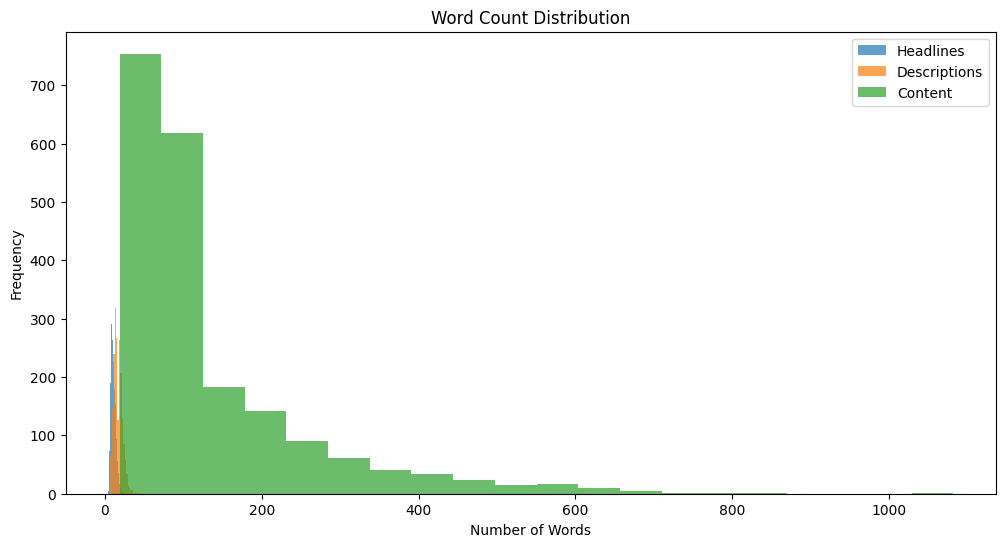

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(X_train_EDA['headline_word_count'], bins=20, alpha=0.7, label='Headlines')
plt.hist(X_train_EDA['description_word_count'], bins=20, alpha=0.7, label='Descriptions')
plt.hist(X_train_EDA['content_word_count'], bins=20, alpha=0.7, label='Content')
plt.title('Word Count Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
def plot_most_common_words(text_column, title):
    all_words = ' '.join(text_column)
    tokens = word_tokenize(all_words)
    fdist = FreqDist(tokens)

    # Plotting
    plt.figure(figsize=(12, 6))
    fdist.plot(30, cumulative=False)
    plt.title(f'Most Common Words in {title}')
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.show()

<Figure size 640x480 with 0 Axes>

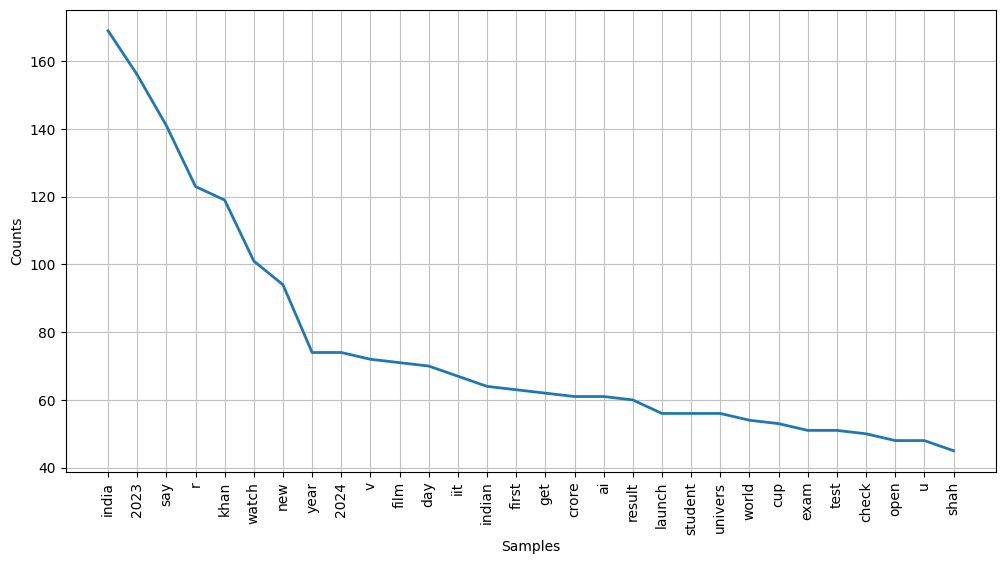

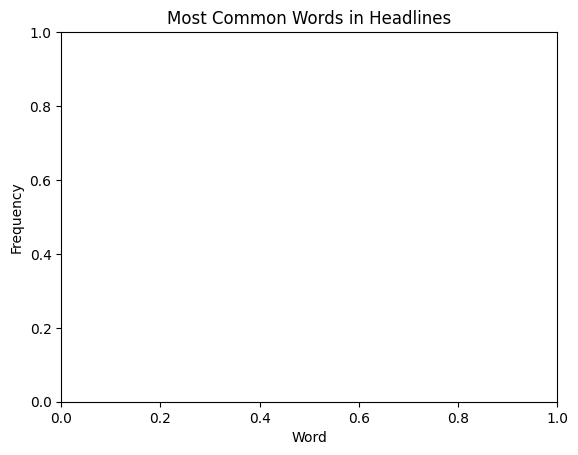

<Figure size 640x480 with 0 Axes>

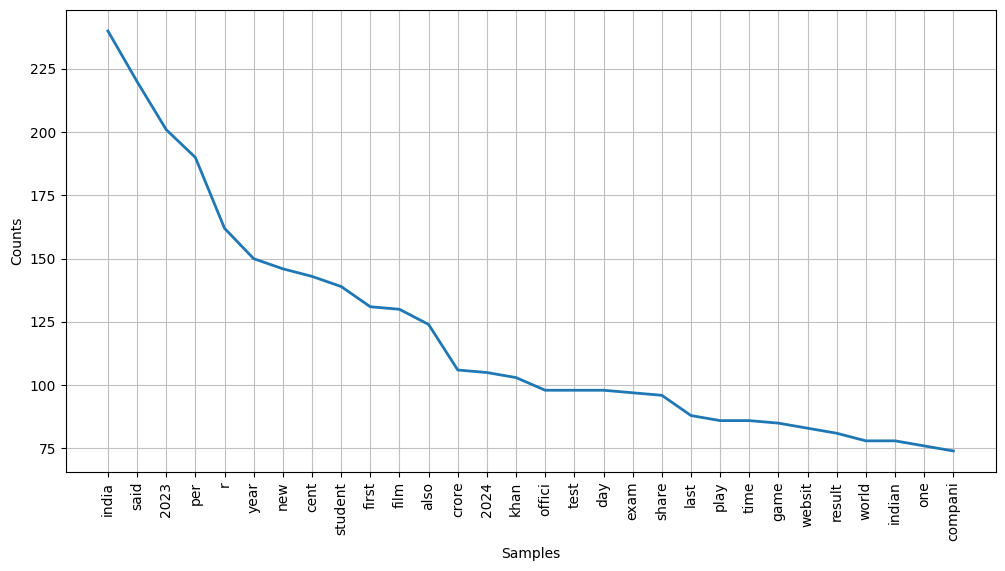

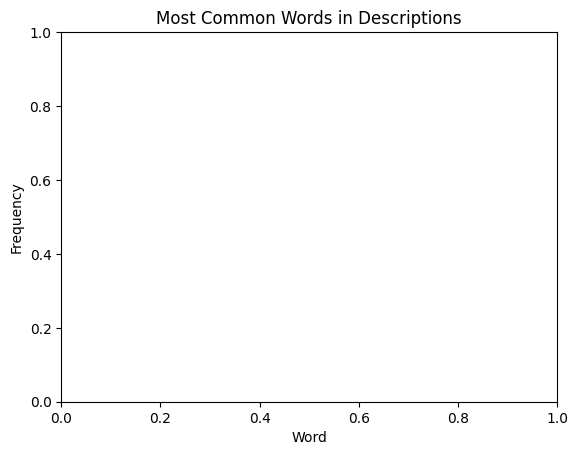

<Figure size 640x480 with 0 Axes>

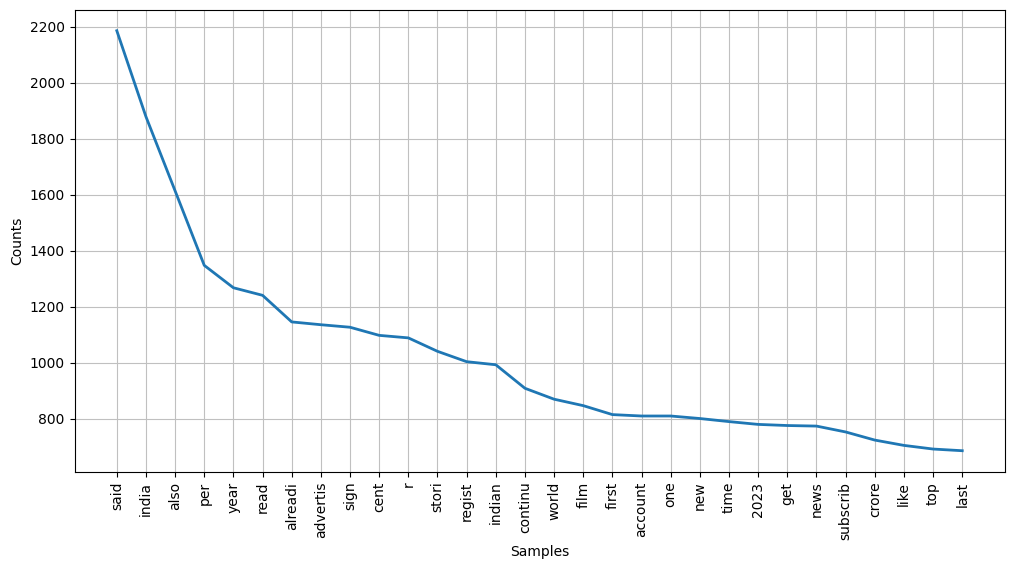

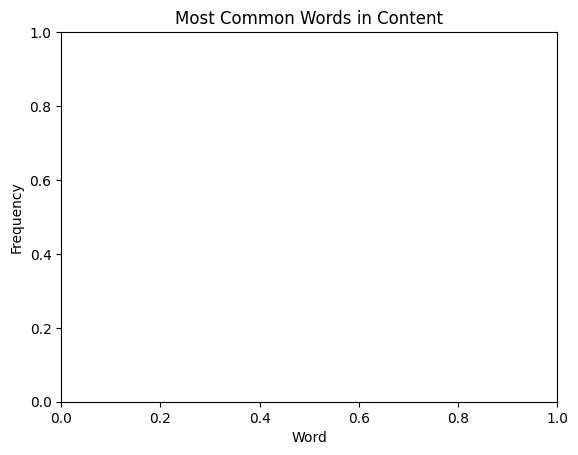

In [ ]:
plot_most_common_words(X_train_EDA['headlines'], 'Headlines')
plot_most_common_words(X_train_EDA['description'], 'Descriptions')
plot_most_common_words(X_train_EDA['content'], 'Content')

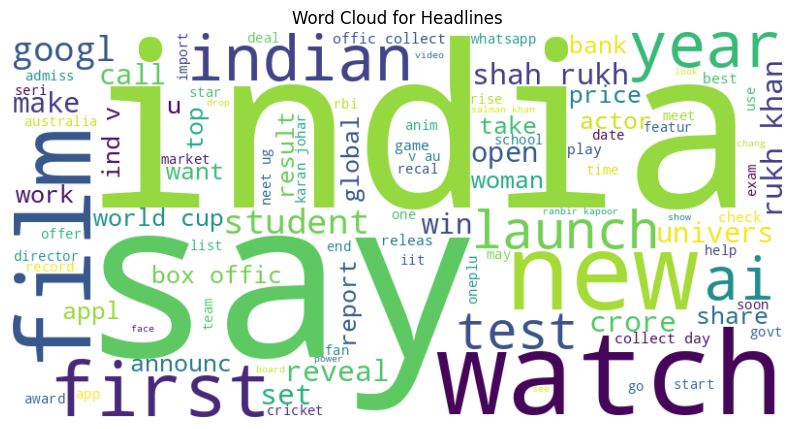

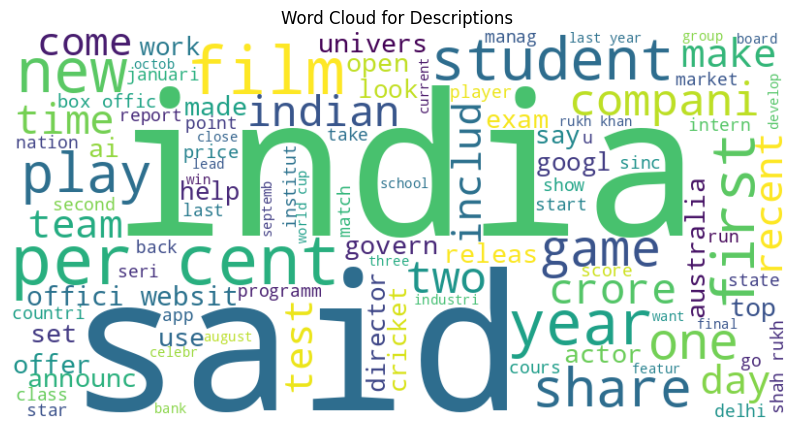

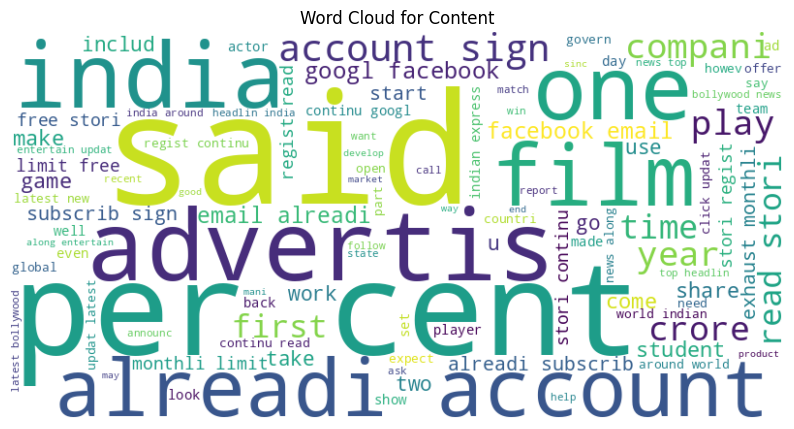

In [ ]:
# Word cloud
def generate_word_cloud(text_column, title):
    all_text = ' '.join(text_column)
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(all_text)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {title}')
    plt.axis('off')
    plt.show()

generate_word_cloud(X_train_EDA['headlines'], 'Headlines')
generate_word_cloud(X_train_EDA['description'], 'Descriptions')
generate_word_cloud(X_train_EDA['content'], 'Content')

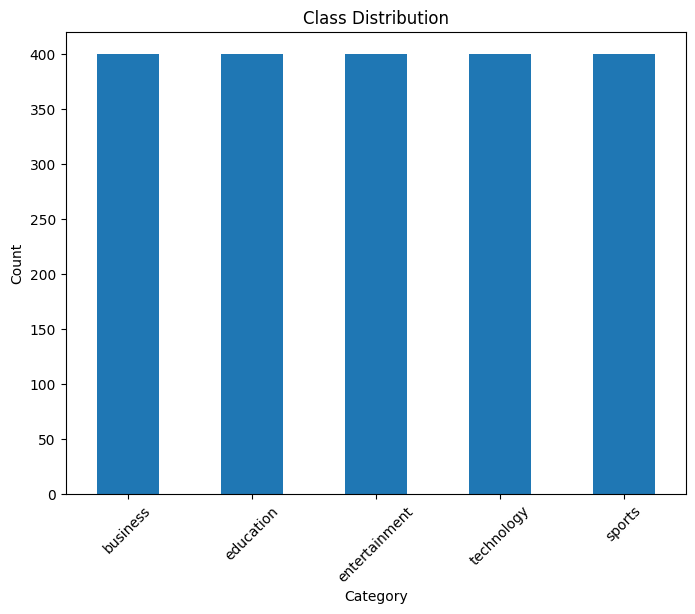

In [ ]:
# Class distribution
class_distribution = X_train_EDA['category'].value_counts()

plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()